- Load a dataset using Pandas and perform data cleaning operations such as removing null values, removing duplicates,number format etc.
- Use Pandas to calculate summary statistics for a dataset, such as mean, median, and standard deviation.
- Create a scatter plot using Matplotlib to visualize the relationship between two variables in a dataset.
- Use Pandas to group the data by a categorical variable and calculate summary statistics for each group.
- Create a line chart using Matplotlib to visualize the trend of a variable over time. --selected dataset does not have timeseries
- Use Pandas to merge two datasets together based on a common key (try this function - merge(table1, table2, on='Column1', how='inner').
- Create a box plot to visualize the distribution of a variable across different categories.
- Create a histogram using Matplotlib to visualize the distribution of a variable in a dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df=pd.read_csv('forbes_richman.csv',encoding="ISO-8859-1")

In [67]:
df.head()

,Rank,Name,Net Worth,Age,Country,Source,Industry
0,1,Elon Musk,$219 B,50.0,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58.0,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73.0,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66.0,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91.0,United States,Berkshire Hathaway,Finance & Investments


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       2509 non-null   int64  
 1   Name       2509 non-null   object 
 2   Net Worth  2509 non-null   object 
 3   Age        2430 non-null   float64
 4   Country    2509 non-null   object 
 5   Source     2509 non-null   object 
 6   Industry   2509 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 137.3+ KB


In [69]:
df.isnull().sum() # <-- only age for some people is missing

Rank          0
Name          0
Net Worth     0
Age          79
Country       0
Source        0
Industry      0
dtype: int64

Net Worth column cleaning as it includes $ and B, for analysis we should have only number:

In [70]:
df['Net Worth']=df['Net Worth'].str.replace('$','',regex=True).str.replace('B','',regex=True)
df['Net Worth']=df['Net Worth'].astype('float')

In [71]:
df.rename(columns={'Net Worth':'Net Worth,billion $'}, inplace=True)

In [72]:
df.describe().round(0)

,Rank,"Net Worth,billion $",Age
count,2509.0,2509.0,2430.0
mean,1255.0,5.0,64.0
std,724.0,11.0,13.0
min,1.0,1.0,19.0
25%,628.0,2.0,55.0
50%,1255.0,2.0,64.0
75%,1882.0,4.0,74.0
max,2509.0,219.0,100.0


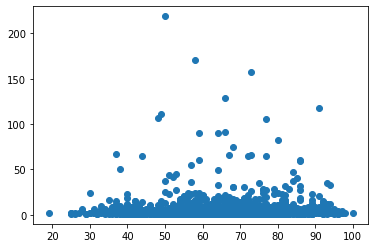

In [73]:
x=df['Age']
y=df['Net Worth,billion $']

plt.scatter(x,y)
plt.show()

In [97]:
# industries by peoples net wroth in it
np.round(df.groupby('Industry')['Net Worth,billion $'].sum().sort_values(ascending=False))

Industry
Technology                    2118.0
Finance & Investments         1647.0
Fashion & Retail              1494.0
Manufacturing                 1046.0
Food & Beverage                898.0
Diversified                    875.0
Healthcare                     655.0
Real Estate                    632.0
Automotive                     571.0
Media & Entertainment          503.0
Metals & Mining                374.0
Energy                         345.0
Logistics                      191.0
Service                        163.0
Construction & Engineering     117.0
Telecom                        113.0
Gambling & Casinos             108.0
Sports                          93.0
Name: Net Worth,billion $, dtype: float64

In [75]:
# average net worth ang age by industry
np.round(df.groupby('Industry')['Net Worth,billion $','Age'].mean().sort_values('Net Worth,billion $',ascending=False))

C:\Users\ernes\AppData\Local\Temp/ipykernel_3832/4081783996.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  np.round(df.groupby('Industry')['Net Worth,billion $','Age'].mean().sort_values('Net Worth,billion $',ascending=False))


,"Net Worth,billion $",Age
Industry,,
Automotive,9.0,64.0
Technology,7.0,56.0
Fashion & Retail,6.0,67.0
Logistics,6.0,68.0
Metals & Mining,6.0,60.0
Media & Entertainment,5.0,63.0
Diversified,5.0,68.0
Food & Beverage,5.0,66.0
Gambling & Casinos,5.0,68.0


In [77]:
pd.pivot_table(data=df,
              index='Country',
              columns='Industry',
              values='Net Worth,billion $',
              aggfunc='mean').fillna(0)

Industry,Automotive,Construction & Engineering,Diversified,Energy,Fashion & Retail,Finance & Investments,Food & Beverage,Gambling & Casinos,Healthcare,Logistics,Manufacturing,Media & Entertainment,Metals & Mining,Real Estate,Service,Sports,Technology,Telecom
Country,,,,,,,,,,,,,,,,,,
Algeria,0.0,0.00,0.000000,0.000000,0.000000,0.000000,5.100000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000
Argentina,0.0,0.00,1.500000,2.350000,0.000000,0.000000,0.000000,0.000000,2.400000,0.000000,0.0000,0.000000,0.00,1.500000,0.0,0.000000,3.900000,0.000
Australia,2.6,0.00,4.200000,0.000000,2.880000,1.900000,2.450000,3.800000,0.000000,2.100000,5.0000,1.450000,8.30,4.257143,0.0,0.000000,6.650000,1.600
Austria,1.2,1.80,7.900000,0.000000,2.450000,0.000000,27.400000,5.000000,0.000000,3.900000,3.0000,0.000000,0.00,5.400000,0.0,0.000000,0.000000,0.000
Barbados,0.0,0.00,0.000000,0.000000,1.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.0,5.70,2.725000,1.700000,2.425000,4.511111,2.050000,3.850000,2.100000,0.000000,7.5800,3.500000,2.30,5.025000,0.0,3.000000,1.566667,2.150
United States,17.9,3.64,12.557143,4.196774,9.290196,5.276503,4.655738,6.983333,3.131034,3.783333,3.4125,6.340476,2.45,3.328571,3.7,3.869565,10.454887,2.875
Uruguay,0.0,0.00,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000


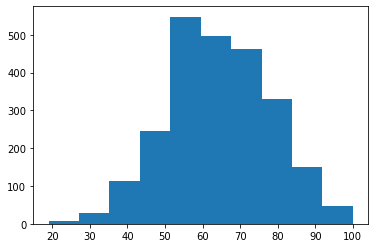

In [78]:
# distribution by age
x=df['Age']

plt.hist(x)

plt.show()

In [81]:
df2=pd.read_csv('gdp_2020.csv')

In [139]:
# merging dataset of countries of where people are from with countries gdp data; GDP data 2020, but wealth is 2022 data
# this is just for a test purpose

df_full=pd.merge(df, df2, on='Country', how='inner')

In [140]:
df_full['gdp']=df_full['gdp']/1000000000

In [142]:
df_full.rename(columns={'gdp':'gdp, bill $'}, inplace=True)

In [143]:
df_full.head()

,Rank,Name,"Net Worth,billion $",Age,Country,Source,Industry,year,rank,state,"gdp, bill $",gdp_percent
0,3,Bernard Arnault & family,158.0,73.0,France,LVMH,Fashion & Retail,2020,6,Europe,2600.0,0.033569
1,13,Francoise Bettencourt Meyers & family,74.8,68.0,France,L'Oréal,Fashion & Retail,2020,6,Europe,2600.0,0.033569
2,29,Rodolphe Saadé & family,41.4,52.0,France,shipping,Logistics,2020,6,Europe,2600.0,0.033569
3,30,François Pinault & family,40.4,85.0,France,luxury goods,Fashion & Retail,2020,6,Europe,2600.0,0.033569
4,41,Gerard Wertheimer,31.2,71.0,France,Chanel,Fashion & Retail,2020,6,Europe,2600.0,0.033569


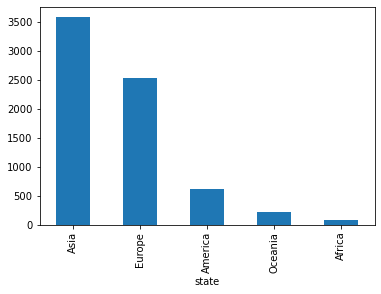

In [189]:
# bar chart by total networth by region
grouped=df_full.groupby('state')['Net Worth,billion $'].sum().sort_values(ascending=False)

grouped.plot(kind='bar')

plt.show()